## THE SPARKS FOUNDATION

## TASK 1: PREDICTION USING SUPERVISED ML

**TASK:Predict the percentage of an student based on the no. of study hours.**

Author: Derlin dominic

### Loading necessary libraries

In [22]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Loading Dataset

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


This dataset contains the no of hours spend on studying and percentage score the student accuquired.

In [4]:
data.shape

(25, 2)

### Statistical Description

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The average time spend by a student is 5 hours and the score accuquired is 51.5 marks.The average scores is 51.480000 .The standard deviation is 25.286887  which is less than the mean the data will be positively skewed.

In [8]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

### Testing for Missing Values

In [10]:
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


There is no missing value in this data so we are proceeding with our analysis

###  Identifying Outliers

<AxesSubplot:xlabel='Hours'>

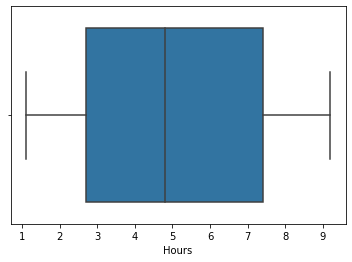

In [13]:
sns.boxplot(x=data['Hours'])

<AxesSubplot:xlabel='Scores'>

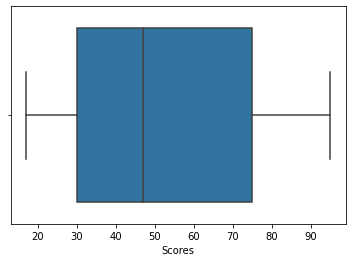

In [14]:
sns.boxplot(x=data['Scores'])

There is no ouliers present in our columns Hours and Scores

###  Data Visualisation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


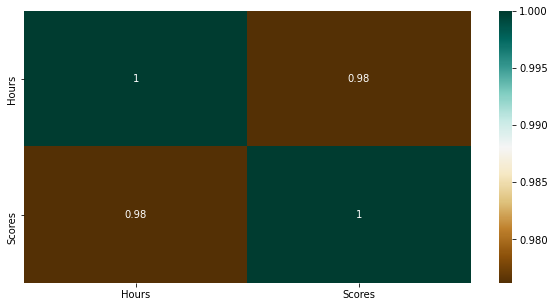

In [15]:
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

**From this correlation analysis we can see that there is a strong correlation between no of hours spend by a student in studying and marks scored by the student.**

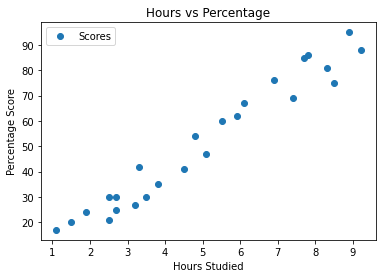

In [16]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### Splitting the data

In [100]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [101]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)# We splitted the data into 80 20 ratio

In [102]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

### Linear Regression Model Building

In [111]:
import sklearn 
from sklearn import linear_model
model_std = LinearRegression()  
model_std.fit(X_train, y_train) 
get_cv_scores(model_std)

CV Mean:  0.3399683322516731
STD:  1.0362738625197836




In [112]:
#testing the accuracy
accuracy = model_ols.score(X_test, y_test)
print("Accuracy:",(int(round(accuracy*100))))

Accuracy: 95


**we got an accuracy of 95% for our model**

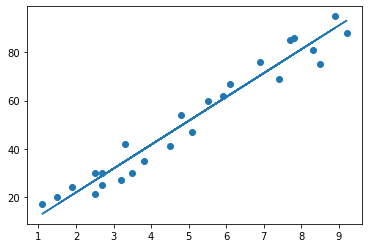

In [113]:
# Plotting the regression line
line = model_std.coef_*X+model_std.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predictions

In [114]:
y_pred = model_std.predict(X_test)

In [115]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


our model showed 95% accuracy, the predicted value is close to the actual value in many cases.

In [116]:
print(model_std.intercept_)
print(model_std.coef_)

2.018160041434683
[9.91065648]


This Gives an idea about every unit increase in no of hours studied how will the scores change. For every unit increase in the no of hours spend the score changes by 9.91.

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [126]:
hours = [9.25]
pre_score = model_std.predict([hours])
print("Predicted Score = {}".format(pre_score))

Predicted Score = [93.69173249]


We predicted 93.69 score when a student studied for 9.25 hours

### Evaluation
The final step is to evaluate the performance of the algorithm. This step is particularly important for comparing the performance of different algorithms on specific data sets

In [50]:
import statistics
SSE = sum((y_pred -  y_test)**2)
SST = sum((statistics.mean(y_pred)-y_test)**2)
R2=1-SSE/SST
R2

0.9456424677505609

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


We have Root Mean Squared Error as 4.64 which is less depicts our model predicts almost same values.AE is simply, the mean of the absolute errors. The absolute error is the absolute value of the difference between the forecasted value and the actual value. Here we have 4.18 which is less. But this model is not fully accurate there are some more factors ehich contribute to the scores of a student.

### Conclusion

Our task was to predict the percentage of an student based on the no. of study hours. Our dataset had two columns The no of hours spend by a student and the score received. There were no missing values and outliers in the dataset. Further, from correlation analysis and data visualisation we can see a positive relationship between no of hours spend and score. So, simple linear regression model was used. We predicted and evaluated the model accordingly.The model showed an accuracy of 95%. We predicted the score of a student if she spend 9.25 hours as 93.69.

## THANKYOU!